# Temporal evolution, two zones,  cooling+acc

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.3.0rc9


This is a very preliminary documentation for the temporal evolution capabilities of jetset. Here we show how to create a decopuled radiative+acceleration region, and how to evolve the system in order to generate both particle spectra, SEDs, and lightcurves

definition of the injected particle distribution (`q_inj`), and of the jet model for the radiative region

In [4]:
from jetset.jet_emitters_factory import InjEmittersFactory
from jetset.jet_model import Jet
jet_model=Jet()
q_inj=InjEmittersFactory().create_inj_emitters('pl',emitters_type='electrons',normalize=True)
q_inj.parameters.gmin.val=9
q_inj.parameters.gmax.val=10
q_inj.parameters.p.val=0.5

jet_model.parameters.beam_obj.val=30
jet_model.parameters.B.val=0.2
jet_model.parameters.z_cosm.val=0.03
jet_model.parameters.R.val=5E15



===> setting C threads to 12


here we set some relevant parameters taht will be described in detail in the next version of the documentation 

In [5]:
flare_duration=1.0E5
duration=flare_duration*10
t_D0=1.5E5
t_A0=2.5E4
T_esc_rad=1E60
L_inj=5.0E39
E_acc_max=4E60
Delta_R_acc_ratio=0.1
B_ratio=1.0
T_SIZE=2E4
NUM_SET=500
Diff_Index=2.0
Acc_Index=1.0

Here we instantiate  the `JetTimeEvol` object, passing the radiative region jet model, and the injected particle class.

In [6]:
from jetset.jet_timedep import JetTimeEvol
temp_ev_acc=JetTimeEvol(jet_rad=jet_model,Q_inj=q_inj,inplace=True)

===> setting C threads to 12
===> setting C threads to 12
adding par: z_cosm to  z_cosm


Now, we setup some relevant parameters

In [7]:
temp_ev_acc.rad_region.jet.nu_min=1E8
temp_ev_acc.acc_region.jet.nu_min=1E8
T_SIZE=np.int32(T_SIZE)

if Delta_R_acc_ratio is not None:
    temp_ev_acc.parameters.Delta_R_acc.val=temp_ev_acc.parameters.R_rad_start.val*Delta_R_acc_ratio

T_esc_acc=t_A0/(temp_ev_acc.parameters.Delta_R_acc.val/3E10)*2



temp_ev_acc.parameters.duration.val=duration
temp_ev_acc.parameters.TStart_Acc.val=0
temp_ev_acc.parameters.TStop_Acc.val=flare_duration
temp_ev_acc.parameters.TStart_Inj.val=0
temp_ev_acc.parameters.TStop_Inj.val=flare_duration
temp_ev_acc.parameters.T_esc_acc.val=T_esc_acc
temp_ev_acc.parameters.T_esc_rad.val=T_esc_rad
temp_ev_acc.parameters.t_D0.val=t_D0
temp_ev_acc.parameters.t_A0.val=t_A0
temp_ev_acc.parameters.Esc_Index_acc.val=Diff_Index-2
temp_ev_acc.parameters.Esc_Index_rad.val=0
temp_ev_acc.parameters.Acc_Index.val=Acc_Index
temp_ev_acc.parameters.Diff_Index.val=Diff_Index
temp_ev_acc.parameters.t_size.val=T_SIZE
temp_ev_acc.parameters.num_samples.val=NUM_SET
temp_ev_acc.parameters.E_acc_max.val=E_acc_max
temp_ev_acc.parameters.L_inj.val=L_inj


temp_ev_acc.parameters.gmin_grid.val=1.0
temp_ev_acc.parameters.gmax_grid.val=1E8
temp_ev_acc.parameters.gamma_grid_size.val=1500

temp_ev_acc.parameters.B_acc.val=temp_ev_acc.rad_region.jet.parameters.B.val*B_ratio
temp_ev_acc.init_TempEv()
temp_ev_acc.show_model()


--------------------------------------------------------------------------------
JetTimeEvol model description
--------------------------------------------------------------------------------
 
physical setup: 

--------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,5.000000e+01,s,0.00029979245799999996,R/c,False
log. sampling,time,0.000000e+00,,None,,False
R/c,time,1.667820e+05,s,1.0,R/c,False
IC cooling,,off,,None,,False
Sync cooling,,on,,None,,False
Adiab. cooling,,on,,None,,False
Reg. expansion,,off,,None,,False
Diff coeff,,6.666667e-06,s-1,None,,False
Acc coeff,,4.000000e-05,s-1,None,,False
Diff index,,2.000000e+00,,None,,False



model parameters: 

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.000000e+06,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.000000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+08,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.500000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Acc,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,T_esc_acc,escape_time,(R_acc/c)*,3.000000e+00,--,--,False,True
jet_time_ev,Esc_Index_acc,fp_coeff_index,,0.000000e+00,--,--,False,True


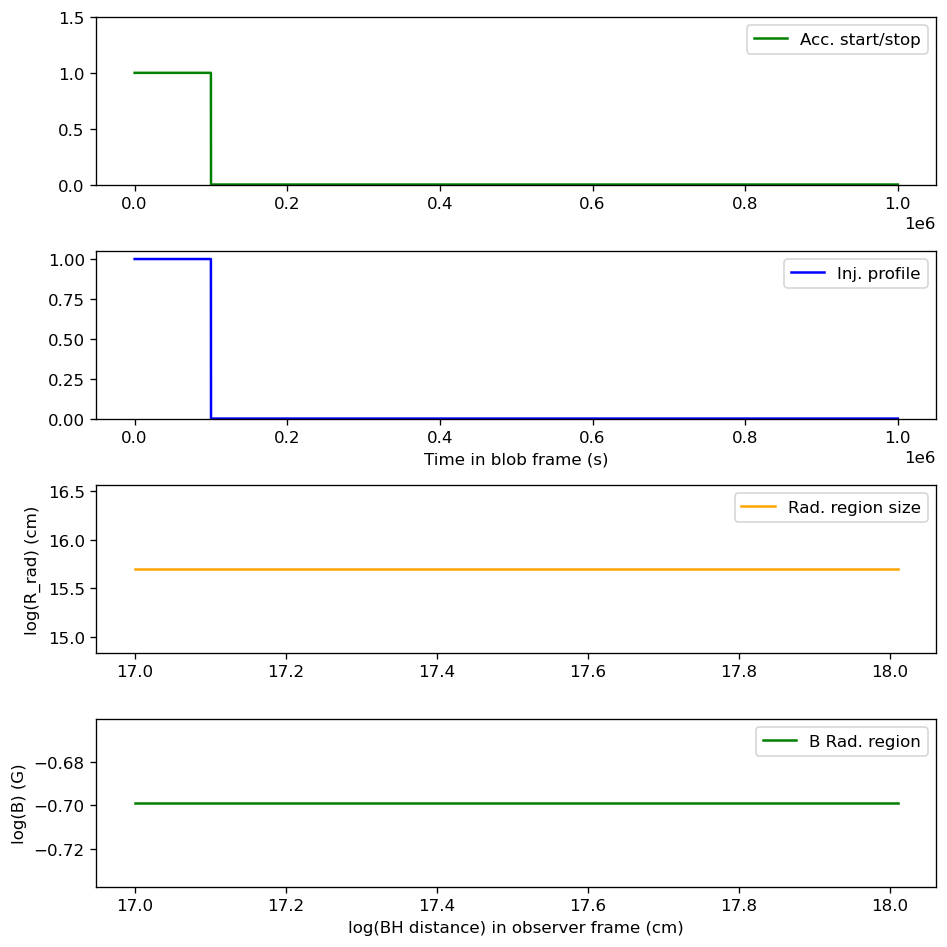

In [8]:
temp_ev_acc.plot_time_profile()

In [9]:
only_injection=True
do_injection=True
plot_fit_model=True
plot_fit_distr=True
plot_emitters=True
plot_lcs=True
delta_t_out=1000
eval_cross_time=False
rest_frame='obs'
temp_ev_acc.run(only_injection=only_injection,
                do_injection=do_injection,
                cache_SEDs_acc=True, 
                cache_SEDs_rad=True)

temporal evolution running


  0%|          | 0/20000 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/500 [00:00<?, ?it/s]

caching SED for each saved distribution: done
caching SED for each saved distribution: start


  0%|          | 0/500 [00:00<?, ?it/s]

caching SED for each saved distribution: done


Particle spectrum in the radiative region

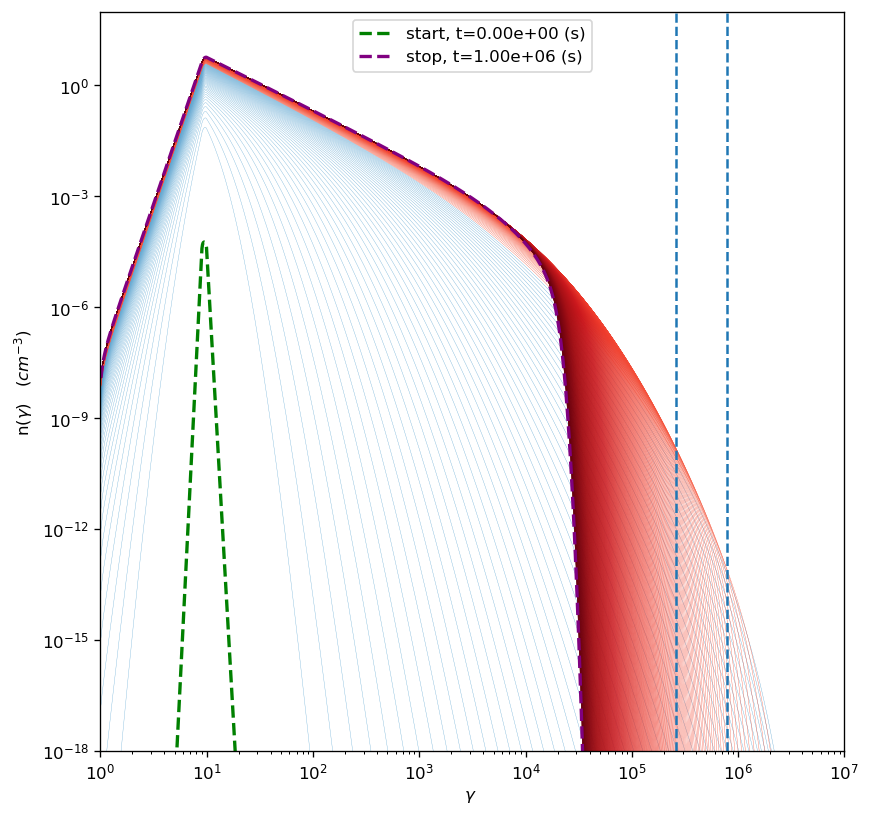

In [10]:
p=temp_ev_acc.plot_tempev_emitters(region='rad',loglog=False,energy_unit='gamma',pow=0)
p.ax.axvline(temp_ev_acc.temp_ev.gamma_eq_t_A, ls='--')
p.ax.axvline(temp_ev_acc.temp_ev.gamma_eq_t_DA, ls='--')
p.setlim(x_max=1E7,x_min=1,y_min=1E-18,y_max=100)

Particle spectrum in the acceleration region

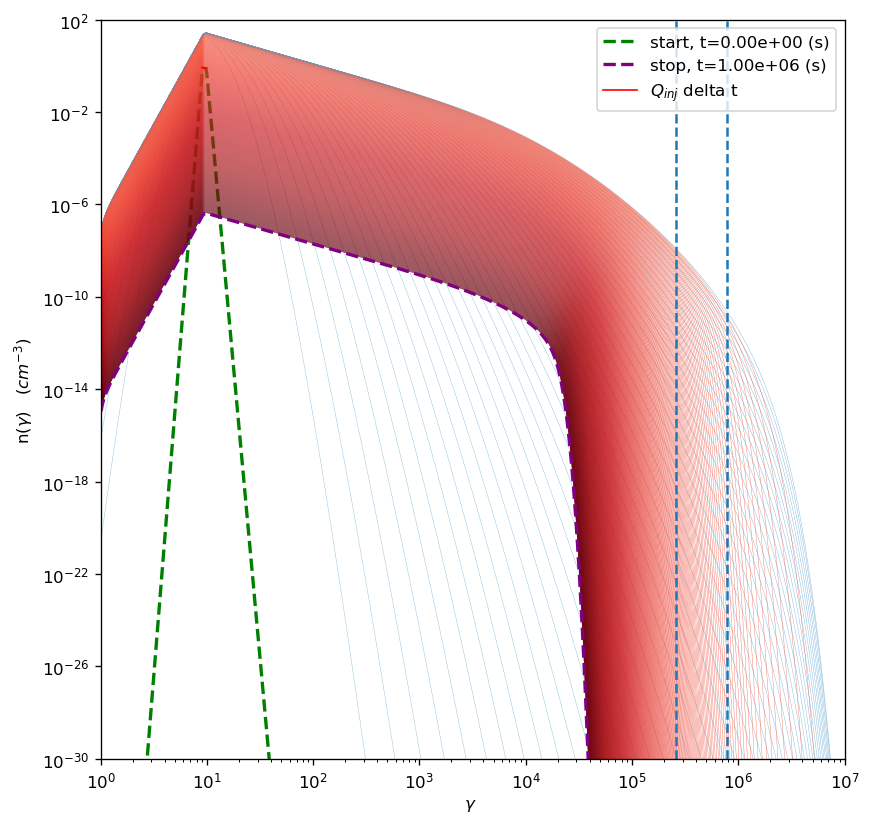

In [11]:
p=temp_ev_acc.plot_tempev_emitters(region='acc',loglog=False,energy_unit='gamma',pow=0)
p.ax.axvline(temp_ev_acc.temp_ev.gamma_eq_t_A, ls='--')
p.ax.axvline(temp_ev_acc.temp_ev.gamma_eq_t_DA, ls='--')
p.setlim(x_max=1E7,x_min=1,y_min=1E-30,y_max=100)


SEDs in the acceleration region

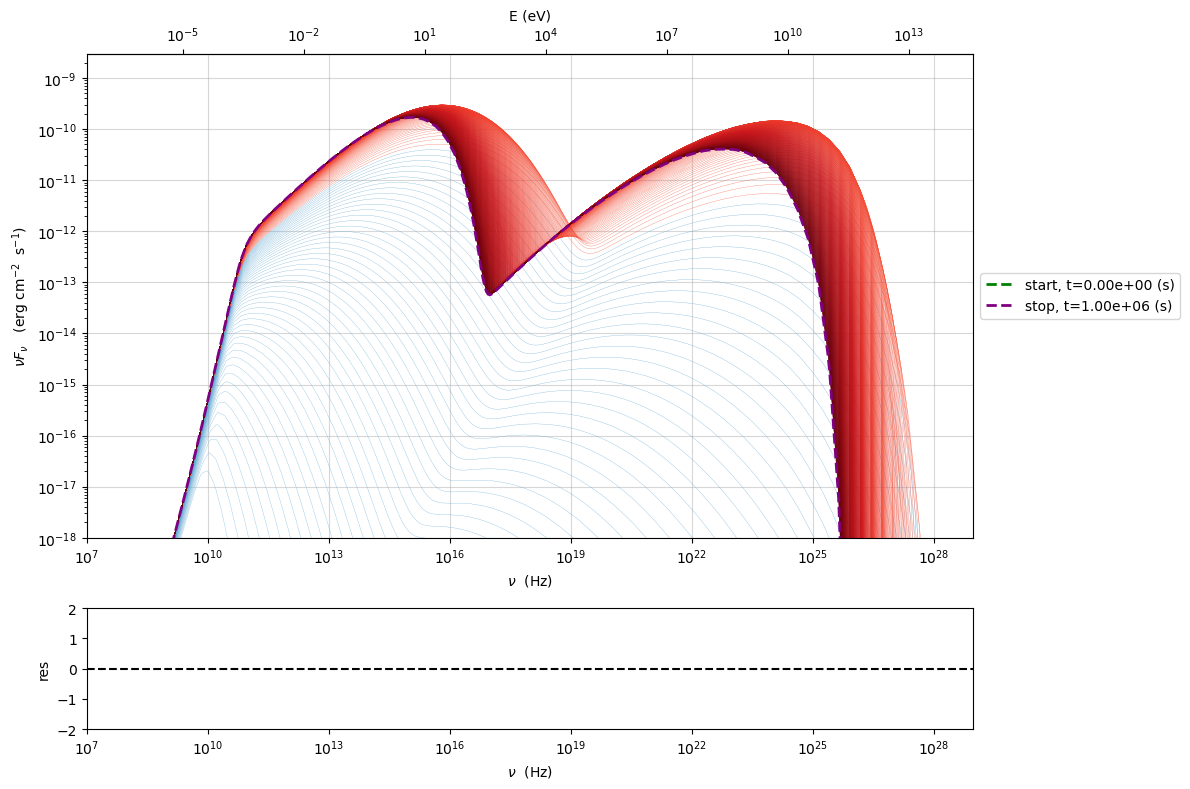

In [12]:
p=temp_ev_acc.plot_tempev_model(region='rad',sed_data=None, use_cached = True)
p.setlim(y_min=1E-18,x_min=1E7)

SEDs in the acceleration region

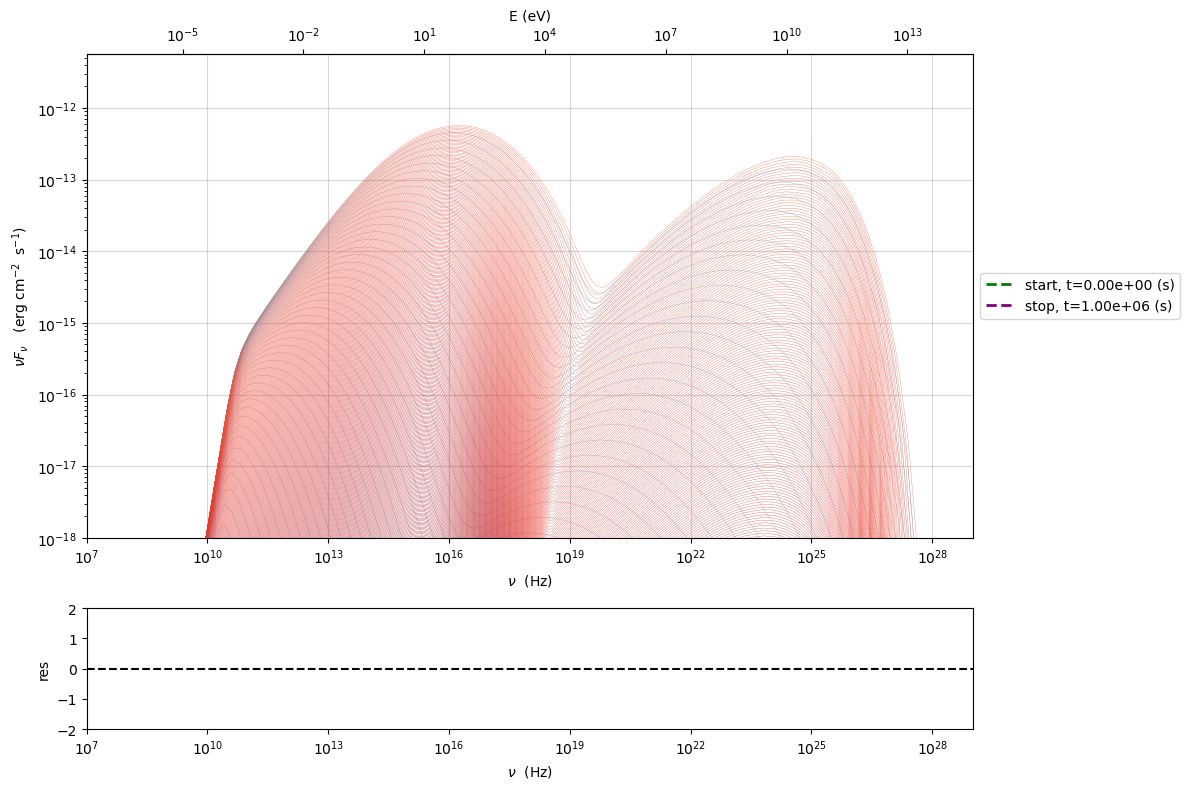

In [13]:
p=temp_ev_acc.plot_tempev_model(region='acc',sed_data=None, use_cached = True)
p.setlim(y_min=1E-18,x_min=1E7)

We generate a lightcurve in the range nu1=2.4E22 Hz, nu2=7.2E25 Hz, without the effect of the light crossing time, in the observer frame

In [14]:
lg=temp_ev_acc.rad_region.make_lc(nu1=2.4E22,nu2=7.2E25,name='gamma',eval_cross_time=False,delta_t_out=100,use_cached=True,frame='obs')


In [15]:
lg

time,flux,R_blob,t_blob
s,erg / (s cm2),cm,s
float64,float64,float64,float64
0.0,0.0,5000000000000000.0,0.0
100.0,0.0,5000000000000000.0,2912.6213592233007
200.0,0.0,5000000000000000.0,5825.242718446601
300.0,7.684633148016865e-86,5000000000000000.0,8737.864077669903
400.0,3.183380180128441e-75,5000000000000000.0,11650.485436893203
500.0,7.931984536411245e-61,5000000000000000.0,14563.106796116504
600.0,6.94642582804193e-55,5000000000000000.0,17475.728155339806
700.0,7.506058875474857e-47,5000000000000000.0,20388.349514563106


Text(0, 0.5, 'flux (erg / (s cm2))')

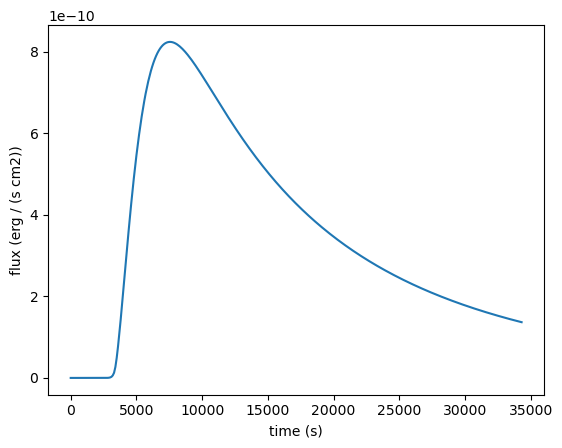

In [16]:
plt.plot(lg['time'],lg['flux'])
plt.xlabel('time (%s)'%lg['time'].unit)
plt.ylabel('flux (%s)'%lg['flux'].unit)

We generate a lightcurve in the range nu1=2.4E22 Hz, nu2=7.2E25 Hz, with the effect of the light crossing time, in the observer frame

In [17]:
lg_cross=temp_ev_acc.rad_region.make_lc(nu1=2.4E22,nu2=7.2E25,name='gamma',eval_cross_time=True,delta_t_out=100,use_cached=True,frame='obs',cross_time_slices=100)


Text(0, 0.5, 'flux (erg / (s cm2))')

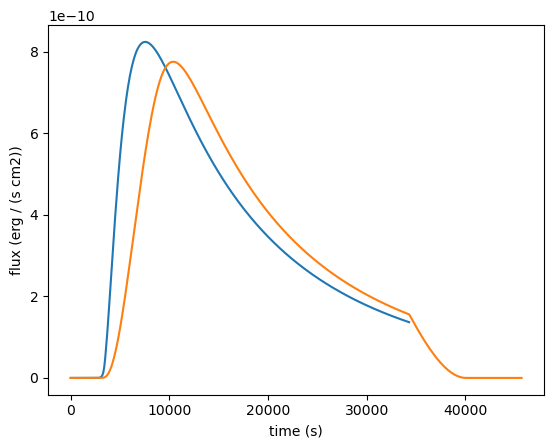

In [18]:
plt.plot(lg['time'],lg['flux'])
plt.plot(lg_cross['time'],lg_cross['flux'])

plt.xlabel('time (%s)'%lg['time'].unit)
plt.ylabel('flux (%s)'%lg['flux'].unit)

We can save the model and reuse it later for plotting lightcurcves, SEDs, and electron distributions

In [19]:
temp_ev_acc.save_model('two_zone_rad_acc.pkl')

In [20]:
temp_ev_acc_1=JetTimeEvol.load_model('two_zone_rad_acc.pkl')

===> setting C threads to 12
===> setting C threads to 12


In [21]:
temp_ev_acc_1.show_model()

--------------------------------------------------------------------------------
JetTimeEvol model description
--------------------------------------------------------------------------------
 
physical setup: 

--------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,5.000000e+01,s,0.00029979245799999996,R/c,False
log. sampling,time,0.000000e+00,,None,,False
R/c,time,1.667820e+05,s,1.0,R/c,False
IC cooling,,off,,None,,False
Sync cooling,,on,,None,,False
Adiab. cooling,,on,,None,,False
Reg. expansion,,off,,None,,False
Diff coeff,,6.666667e-06,s-1,None,,False
Acc coeff,,4.000000e-05,s-1,None,,False
Diff index,,2.000000e+00,,None,,False



model parameters: 

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.000000e+06,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.000000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+08,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.500000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Acc,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,T_esc_acc,escape_time,(R_acc/c)*,3.000000e+00,--,--,False,True
jet_time_ev,Esc_Index_acc,fp_coeff_index,,0.000000e+00,--,--,False,True


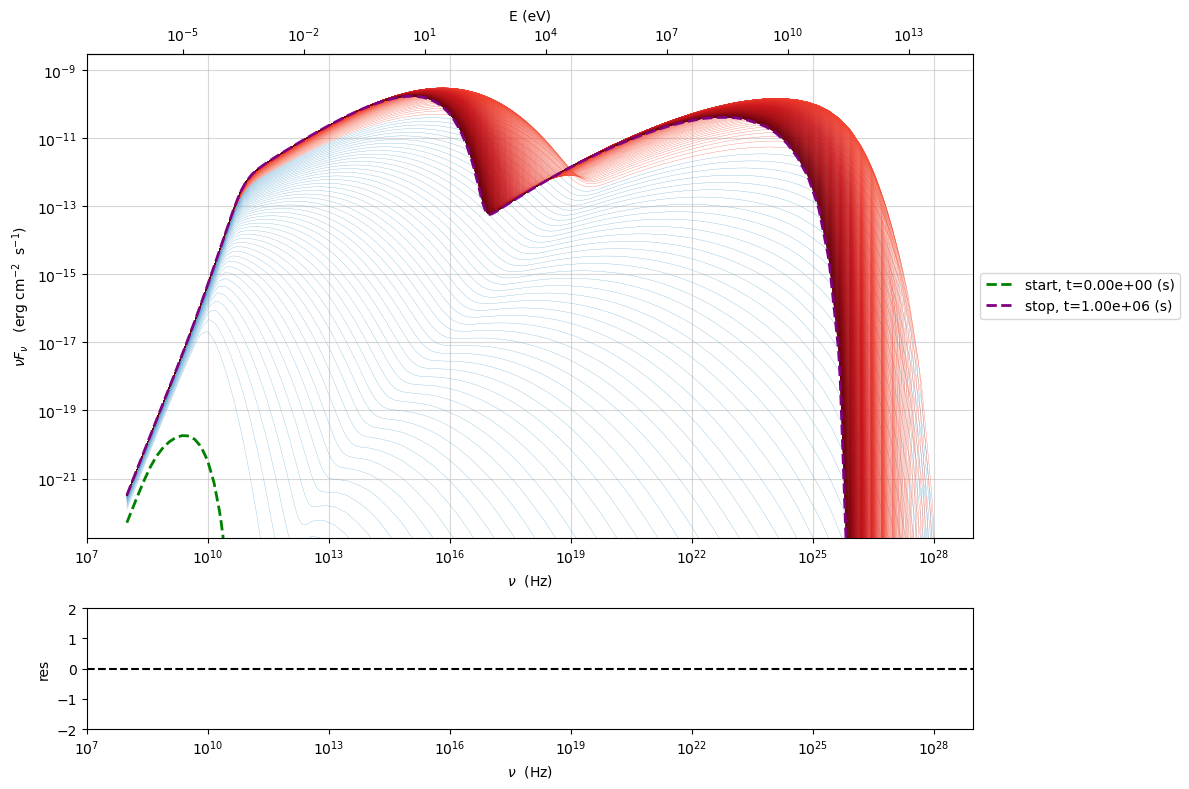

In [22]:
p=temp_ev_acc_1.plot_tempev_model(region='rad',sed_data=None, use_cached = True)


Text(0, 0.5, 'flux (erg / (s cm2))')

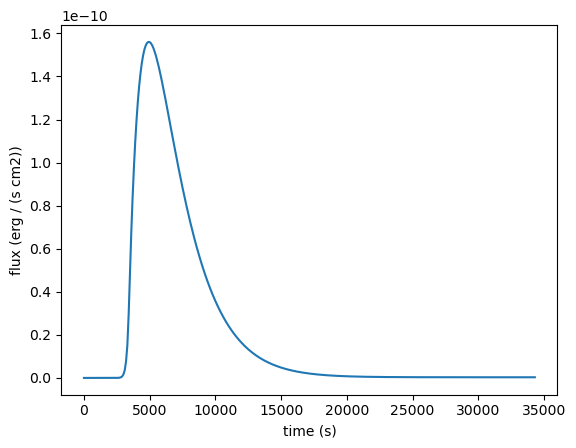

In [23]:
lx=temp_ev_acc_1.rad_region.make_lc(nu1=1E17,nu2=1E18,name='X',eval_cross_time=False,delta_t_out=100,use_cached=True,frame='obs')
plt.plot(lx['time'],lx['flux'])
plt.xlabel('time (%s)'%lg['time'].unit)
plt.ylabel('flux (%s)'%lg['flux'].unit)